In [ ]:
""" 
Summary plots, using old task representations. 
Motivated by Luca experiment (Kedar)
"""


In [5]:
# %cd ..
# from tools.utils import * 
# from tools.plots import *
# from tools.analy import *
# from tools.calc import *
# from tools.analyplot import *
# from tools.preprocess import *
# from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
import pythonlib
from pythonlib.dataset.dataset import Dataset
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

##### Try loading a single dataset

In [6]:
expt = "naive8luca5" #run for chunkbyshape1, chunkbyshape2
animal = "Luca"
# rulelist = get_rulelist(animal, expt)
D = Dataset([])
# D.load_dataset_helper(animal, expt, ver="mult", rule=rulelist)
D.load_dataset_helper(animal, expt)
# D.load_tasks_helper()



Searching using this string:
/home/lucast4/data2/analyses/database/*Luca*naive8luca5**/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/home/lucast4/data2/analyses/database/BEH/*Luca*naive8luca5**/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/home/lucast4/data2/analyses/database/BEH/Luca-naive8luca5-null-220710_175714
----------------
Currently loading: /home/lucast4/data2/analyses/database/BEH/Luca-naive8luca5-null-220710_175714
Loaded metadat:
{'sketchpad_edges': array([[-404., -532.],
       [ 404.,  532.]]), 'metadat_probedat': {'sdate': 220630, 'edate': 220701, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'220630': 1, '220701': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['naive8luca5'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt': 'naive8luca5', 'animal': 'Luca', 'ssess': None, 'esess': Non

##### Bin tasks based on task stroke features

(<Figure size 144x180 with 1 Axes>, array([[<AxesSubplot:>]], dtype=object))

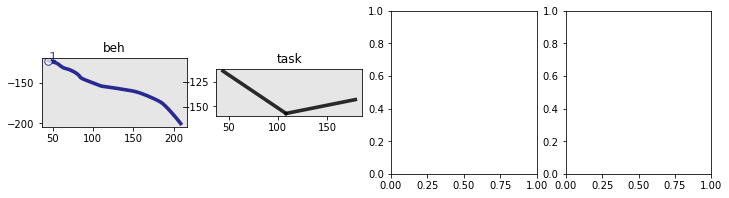

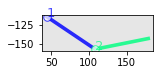

In [67]:
# Pick an example trial
indtrial = 101

# Plot it
D.plotSingleTrial(indtrial)

# Plot task using colors, to figure out what direction the task strokes are defined in.
strokes_task = D.Dat.iloc[indtrial]["strokes_task"]
D.plotMultStrokes([strokes_task])

In [68]:
from pythonlib.behavior.strokeclass import StrokeClass
from pythonlib.tools.vectools import angle_diff, get_vector_between_points, get_angle, bin_angle_by_direction

# Extract task strokes
Strokes = [StrokeClass(strok) for strok in D.Dat.iloc[indtrial]["strokes_task"]]

# Extract three features (length, angle_between_segments (acuteness), angle_arrowhead (which way pointing)) 
# 1) length of each stroke segment
list_len = [S.extract_single_feature('distcum') for S in Strokes]
len_tot = np.sum(list_len)
print("1. length of task: ", len_tot)

# 2) Angle between two segments
list_angle = [S.extract_single_feature('angle') for S in Strokes]
# -- given each strok's angle, you can compute the angle between them
from math import pi
ad = pi - angle_diff(list_angle[0], list_angle[1])
print("2. angle between two segments (rad): ", ad)

# 3) Direction the "arrowhead" is pointing
# vector pointing in direction of arrowhead
pt1 = strokes_task[0][0,:2]
pt2 = strokes_task[1][-1,:2]
pt_arrow_1 = (pt1 + pt2)/2 # center of line connecting first and last pts of task
pt_arrow_2 = strokes_task[1][0,:2] # pt at the tip of arrowhead
vec_arrow = get_vector_between_points(pt_arrow_1, pt_arrow_2)
angle_arrow = get_angle(vec_arrow)
print("3. This is the vector for the arrowhead: ", vec_arrow)
print("And the angle of the vector: ", angle_arrow)

print(" ** Confirm these values make sense given the drawing plotted above")

1. length of task:  149.21395048588357
2. angle between two segments (rad):  2.3521385311019163
3. This is the vector for the arrowhead:  (-3.1954293362841213, -28.619334903277263)
And the angle of the vector:  4.601196692263878
 ** Confirm these values make sense given the drawing plotted above


##### Bin tasks into categories

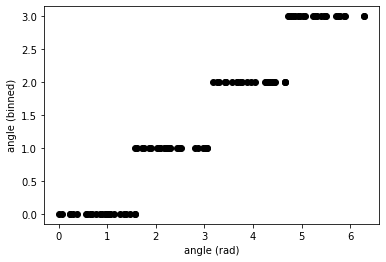

In [69]:
# 4) To group tasks into categories based on their (length, angle_between_segments, angle_arrowhead), bin
# each of these features. For example

# Here is a fake distribution of angles. Replace this with distribution over tasks.
list_angles = 2*pi*np.random.rand(100)

# Bin tthe angles
list_angles_binned = bin_angle_by_direction(list_angles, 4, binnames={1: 0, 2: 1, 3: 2, 4: 3, 5: np.nan});

# Plot to see
plt.figure()
plt.plot(list_angles, list_angles_binned, 'ok')
plt.xlabel('angle (rad)');
plt.ylabel('angle (binned)');

# TODO: represent each task using discrete features, e.g,, (length bin, angle bin, angle bin). if you have 
# 2, 2, 4 bins, this gives 16 total task categories. 



##### TODO: Then, for each task category plot (1) drawings (2) scores.